In [219]:
pip install mplsoccer

In [220]:
pip install highlight-text

In [221]:
pip install soccerplots

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns
from soccerplots.utils import add_image
from highlight_text import fig_text

In [223]:
df = pd.read_csv('Bruno.csv')

In [224]:
df['x'] = df['x']*1.2
df['y'] = df['y']*.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*.8

values = df['result'].value_counts()
nbr_pass = sum(values)

success_rate = values/nbr_pass * 100
print(values)
round(success_rate,1)



Successful      63
Unsuccessful    10
Name: result, dtype: int64


Successful      86.3
Unsuccessful    13.7
Name: result, dtype: float64

In [225]:
df.head()

,x,y,type/displayName,result,endX,endY
0,56.40,40.32,Pass,Successful,52.44,50.48
1,54.48,38.48,Pass,Successful,37.32,35.12
2,43.68,27.68,Pass,Successful,40.32,55.92
3,53.04,28.88,Pass,Unsuccessful,77.88,11.28
4,41.76,53.60,Pass,Successful,43.20,62.80


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.22 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'transparency'
  **contour_kws,


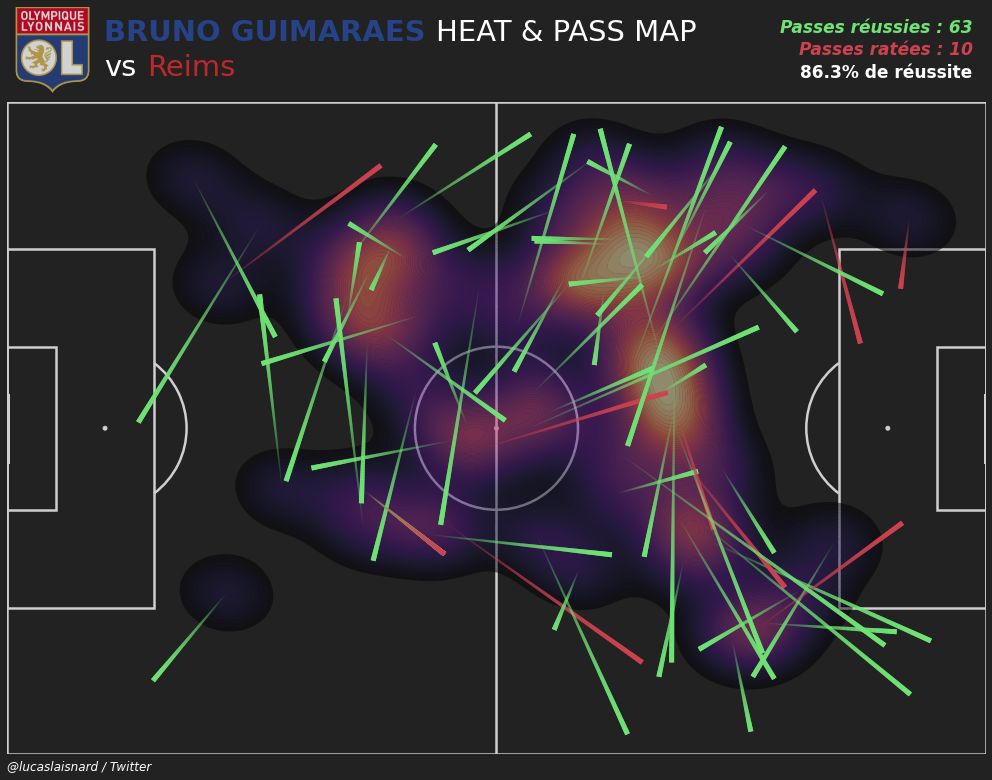

In [227]:
fig ,ax = plt.subplots(figsize=(18,12))
fig.set_facecolor('#222223')
ax.patch.set_facecolor('#CFCFCF')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#222223', line_color='#CFCFCF', linewidth=2.5, figsize=(13, 8),
              constrained_layout=True, tight_layout=False) 

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

kde = sns.kdeplot(
        df['x'],
        df['y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=70,
        cmap = 'magma',
        y=None,
        bw=0.22, 
        gridsize=200, 
        cut=3, 
        clip=None, 
        legend=True, 
        cumulative=False, 
        cbar=False, 
        cbar_ax=None, 
        cbar_kws=None, 
        ax=None, 
        weights=None, 
        hue=None, 
        palette=None, 
        hue_order=None, 
        hue_norm=None, 
        common_norm=True, 
        common_grid=False, 
        thresh=0.05, 
        bw_method='scott', 
        bw_adjust=1, 
        log_scale=None, 
        color=None, 
        fill=None, 
        data=None, 
        data2=None,
        transparency=True, 
        antialiased = True)


for x in range(len(df['x'])):
    if df['result'][x] == 'Successful':
        pitch.lines(df['x'][x],
                    df['y'][x], 
                    df['endX'][x],
                    df['endY'][x], 
                    lw=5, 
                    transparent=True, 
                    comet=True, 
                    label='Passes réussies',
                    color='#70E375', 
                    ax=ax,)
    
    if df['result'][x] == 'Unsuccessful':
        pitch.lines(df['x'][x],
                    df['y'][x],
                    df['endX'][x],
                    df['endY'][x], 
                    lw=5, 
                    transparent=True, 
                    comet=True, 
                    label='Passes Ratées',
                    color='#CE424F', 
                    ax=ax)

         
plt.xlim(0,120)
plt.ylim(0,80)



fig_text(s = 'BRUNO GUIMARAES <HEAT & PASS MAP> \n<vs> <Reims>',
         x = .21, y=0.94,
         fontsize = 29,
         va = ('center'),
         color = '#264288',
         fontweight = 'bold',
        
         highlight_colors = ('w', 'w', '#BE282B'))

fig_text(s = '<Passes réussies : 63>\n<Passes ratées : 10>\n86.3% de réussite',
         x = .88, y=0.94,
         fontsize = 17,
         va = ('center'),
         ha = ('right'),
         color = 'white',
         fontweight = 'bold',
         highlight_weights = ['bold'],
         highlight_styles = ['italic'],
         highlight_colors = ('#70E375', '#CE424F'))
        


fig.patch.set_color('#222222')


plt.text(s='@lucaslaisnard / Twitter',
         fontstyle = 'italic',
         color = 'white',
         x = -0.0000001, y = -1.89,
         ha = "left",
         fontsize = 12,
         fontname = "helvetica")

greenPatch = pitch.lines(df['x'][x],df['y'][x],  df['endX'][x], df['endY'][x], 
                         lw=5, transparent=True, comet=True, label='Passes réussies', color='#70E375', ax=ax,)
redPatch = pitch.lines(df['x'][x],df['y'][x], df['endX'][x],df['endY'][x], 
                       lw=5, transparent=True, comet=True, label='Passes Ratées',color='#CE424F',ax=ax)



add_image(image="lucas.png", fig=fig, left=0.78, bottom=0.644, width=0.1, height=0.3, visible = False)  
add_image(image="lyon.png", fig=fig, left=0.12, bottom=0.89, width=0.1, height=0.1)


plt.savefig('Bruno_Pass_Map', dpi=300, facecolor='#222222', edgecolor='w',
    orientation='portrait', papertype=None, format=None,
    transparent=False, bbox_inches='tight', pad_inches=0.1)

